In [2]:
%matplotlib inline
from mxnet import gluon, init
from mxnet.gluon import loss as gloss, nn
import common as comm

In [3]:
#读取数据
batch_size = 256
train_iter, test_iter = comm.load_data_fashion_mnist(batch_size)

In [4]:
for features, labels in train_iter:
    print(features.shape, labels.shape)
    break

(256, 1, 28, 28) (256,)


In [5]:
labels[:10]


[9 7 4 7 8 0 5 4 8 0]
<NDArray 10 @cpu_shared(0)>

In [6]:
#初始化参数模型
net = nn.Sequential()
net.add(nn.Dense(10))
net.initialize(init.Normal(sigma = 0.1))

In [7]:
#损失函数
loss = gloss.SoftmaxCrossEntropyLoss()

In [13]:
#优化算法
trainer = gluon.Trainer(net.collect_params(), 'sgd', {'learning_rate':0.1})

In [14]:
num_epochs = 300
comm.train_ch3(net, train_iter, test_iter, loss, num_epochs, batch_size, None, None, trainer)

epoch 1, loss 0.8387, train acc 0.717, test acc 0.792
epoch 2, loss 0.5878, train acc 0.803, test acc 0.818
epoch 3, loss 0.5390, train acc 0.819, test acc 0.828
epoch 4, loss 0.5133, train acc 0.826, test acc 0.828
epoch 5, loss 0.4981, train acc 0.829, test acc 0.836
epoch 6, loss 0.4845, train acc 0.834, test acc 0.839
epoch 7, loss 0.4747, train acc 0.839, test acc 0.842
epoch 8, loss 0.4678, train acc 0.840, test acc 0.843
epoch 9, loss 0.4611, train acc 0.843, test acc 0.846
epoch 10, loss 0.4560, train acc 0.843, test acc 0.847
epoch 11, loss 0.4517, train acc 0.845, test acc 0.847
epoch 12, loss 0.4475, train acc 0.846, test acc 0.847
epoch 13, loss 0.4442, train acc 0.848, test acc 0.847
epoch 14, loss 0.4405, train acc 0.849, test acc 0.849
epoch 15, loss 0.4377, train acc 0.850, test acc 0.848
epoch 16, loss 0.4359, train acc 0.850, test acc 0.851
epoch 17, loss 0.4329, train acc 0.852, test acc 0.854
epoch 18, loss 0.4312, train acc 0.853, test acc 0.850
epoch 19, loss 0.42

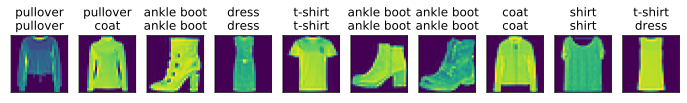

In [16]:
for X, y in test_iter:
    break

true_labels = comm.get_fashion_mnist_labels(y.asnumpy())
pred_labels = comm.get_fashion_mnist_labels(net(X).argmax(axis=1).asnumpy())
titles = [true + '\n' + pred for true, pred in zip(true_labels, pred_labels)]

comm.show_fashion_mnist(X[50:60], titles[50:60])